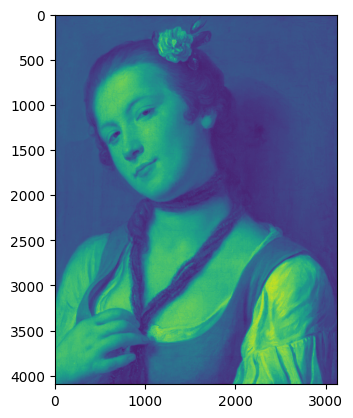

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import random

img_color = cv2.imread("a_girl_with_a_flower_in_her_hair_1939.1.108.jpg",1)
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

height = img_gray.shape[0]
width = img_gray.shape[1]

fig = plt.figure()
plt.imshow(img_gray)


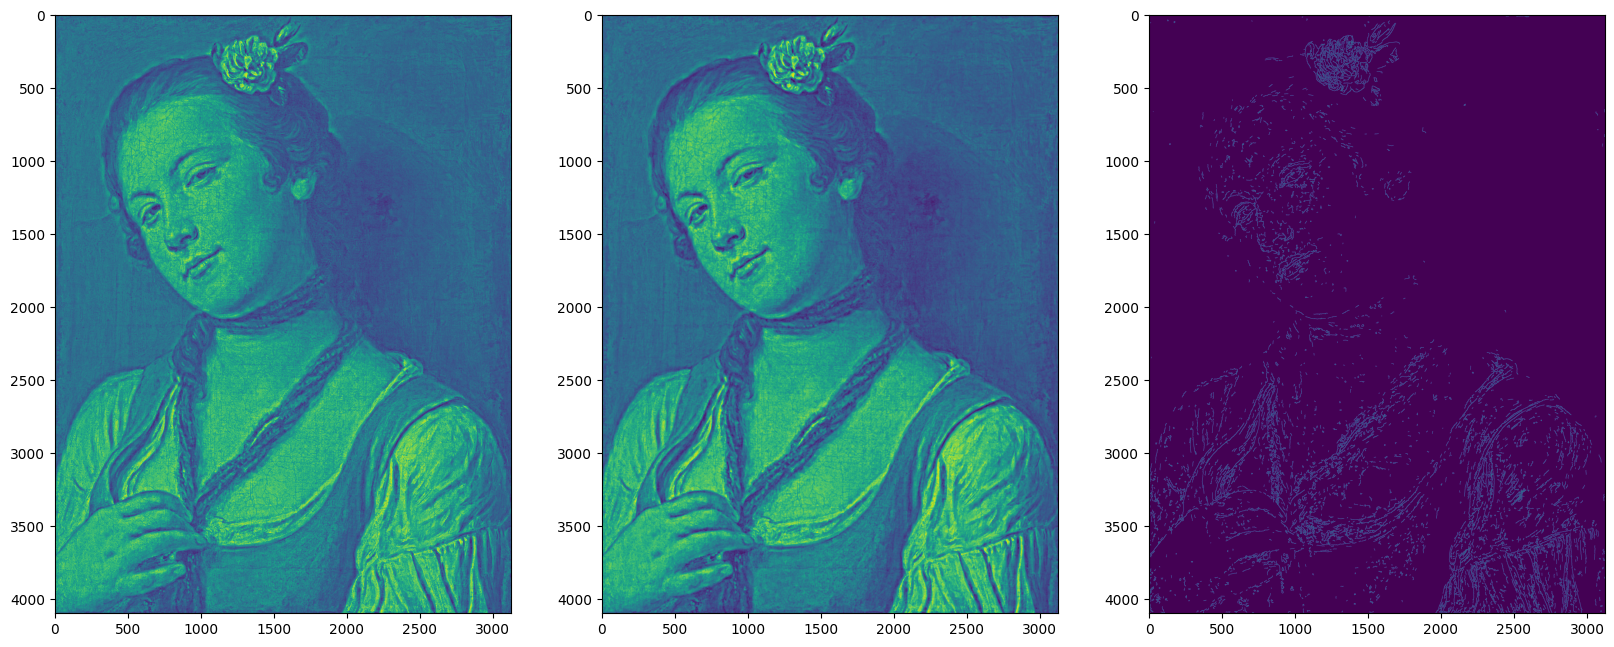

In [2]:
# clahe edge

clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(100,100))
cl1 = clahe.apply(img_gray)

fig = plt.figure()
fig.set_size_inches(20,20)
ax = fig.add_subplot(1,3,1)
plt.imshow(cl1)

blurred = cv2.GaussianBlur(cl1, (11, 11), 0)
ax = fig.add_subplot(1,3,2)
plt.imshow(blurred)

edges = cv2.Canny(blurred,50,85,apertureSize=3,L2gradient=True)
ax = fig.add_subplot(1,3,3)
plt.imshow(edges)

In [20]:
indices = np.where(edges != [0])
edge_coordinates = list(zip(indices[0], indices[1]))

In [18]:
choices = [1, 2, 3]
weights = (0.0, 0.0, 1.0)

def split_rectangle(rectangle, direction, divisions):

    new_rectangles = []

    if direction == 0:
        first_pixel = rectangle[1]
        for i in range(divisions):
            inc = round((rectangle[2])/(divisions-i))
            new_rectangles.append([rectangle[0],first_pixel,inc,rectangle[3]])
            first_pixel = first_pixel + inc + 1
    elif direction == 1:
        first_pixel = rectangle[0]
        for i in range(divisions):
            inc = round((rectangle[3])/(divisions-i))
            new_rectangles.append([first_pixel, rectangle[1], rectangle[2], inc])
            first_pixel = first_pixel + inc + 1

    return new_rectangles


rect = [0, 0, img_color.shape[0], img_color.shape[1]]
print(rect)

rect_list = [rect]

for i in range(3):
    new_rect_list = []
    for rectangle in rect_list:
        number_of_divisions = random.choices(choices, cum_weights=weights, k=1)[0]
        new_rect_list.extend(split_rectangle(rectangle,i%2,number_of_divisions))
    rect_list = new_rect_list

print(len(rect_list))

[0, 0, 4096, 3123]
27


In [14]:
print(rect_list)

[[0, 0, 455, 1041], [0, 456, 454, 1041], [0, 911, 454, 1041], [1042, 1042, 108, 1040], [1042, 1151, 107, 1040], [1042, 1259, 106, 1040], [2083, 2083, -239, 1040], [2083, 1845, -240, 1040], [2083, 1606, -241, 1040], [1366, 1366, 0, 586], [1366, 1367, -1, 586], [1366, 1367, -2, 586], [1953, 1953, -196, 585], [1953, 1758, -196, 585], [1953, 1563, -198, 585], [2539, 2539, -391, 584], [2539, 2149, -392, 584], [2539, 1758, -393, 584], [2732, 2732, -456, 130], [2732, 2277, -456, 130], [2732, 1822, -458, 130], [2863, 2863, -500, 130], [2863, 2364, -500, 130], [2863, 1865, -501, 130], [2994, 2994, -543, 129], [2994, 2452, -544, 129], [2994, 1909, -545, 129]]


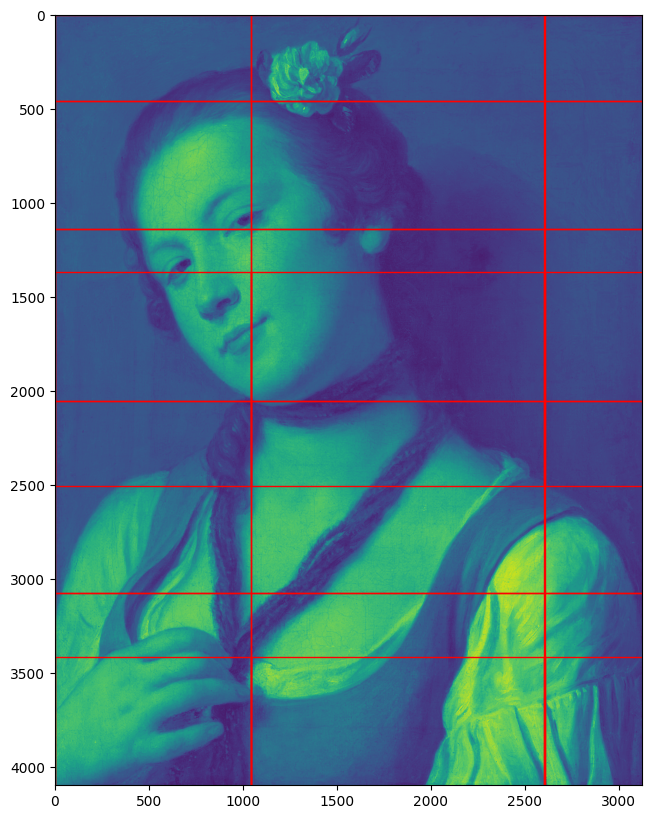

In [19]:
""""
# fist rectangle ROI
img_small = img_color[rect_end_pixel[0]:rect_end_pixel[1], 0:width]  
# mean color of first rectangle (GBR)
col = img_small.mean(axis=0).mean(axis=0)
# converte color to RGB
col = col[::-1]


# find dominant color
pixels = np.float32(img_small.reshape(-1, 3))

n_colors = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS

_, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)
dominant = palette[np.argmax(counts)]
dominant = dominant[::-1]
print(dominant)
"""

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
#ax = fig.add_subplot(1,2,1)
plt.imshow(img_gray)

for rect in rect_list:
    # draw rectangles on image
    rect_1 = patches.Rectangle((rect[0], rect[1]), rect[3], rect[2], linewidth=1, edgecolor='r', facecolor="none")
    ax.add_patch(rect_1)

# draw first rectangle 
#ax = fig.add_subplot(1,2,2)
# plt.imshow(img_small)

In [ ]:
4%2


0